<a href="https://colab.research.google.com/github/Malbasahi/TechnoHacks_Movie_Reviews_Classification/blob/main/Movie_Reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the labeled training dataset
data = pd.read_csv('labeledTrainData.tsv', delimiter='\t')

In [3]:
# Display the first few rows of the dataset
print(data.head())

       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...


In [4]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


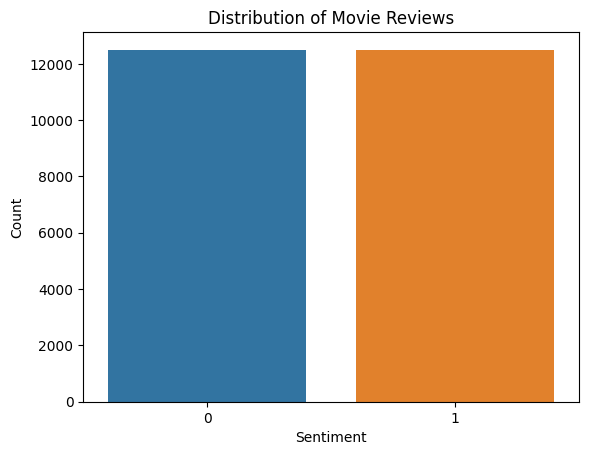

In [5]:
sentiment_counts = data['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Movie Reviews')
plt.show()

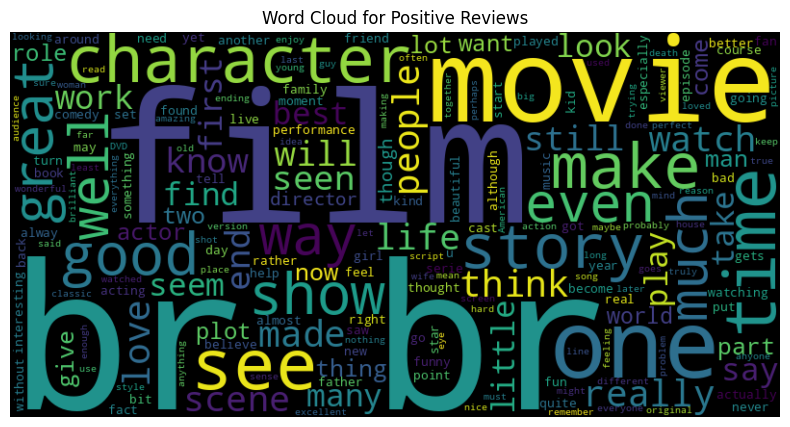

In [104]:
from wordcloud import WordCloud

# Filter out empty positive reviews
positive_reviews = data[(data['sentiment'] == 1) & (data['review'].str.strip() != '')]['review']

if not positive_reviews.empty:
    # Create a word cloud for positive reviews
    positive_wordcloud = WordCloud(width=800, height=400).generate(' '.join(positive_reviews))
    plt.figure(figsize=(10, 5))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for Positive Reviews')
    plt.axis('off')
    plt.show()
else:
    print("No positive reviews available for word cloud generation.")

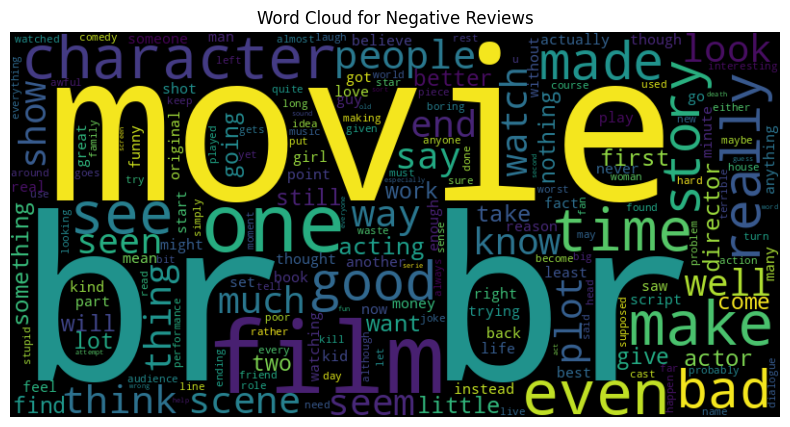

In [69]:
# Create a word cloud for negative reviews
negative_reviews = data[data['sentiment'] == 0]['review']
negative_wordcloud = WordCloud(width=800, height=400).generate(' '.join(negative_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [6]:
# Split the dataset into training and testing sets
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
# Initialize and train a Logistic Regression classifier with L2 regularization
logistic_classifier = LogisticRegression(C=1.0, penalty='l2', random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

# Perform cross-validation to evaluate the model
cross_val_scores = cross_val_score(logistic_classifier, X_train_tfidf, y_train, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean CV accuracy:", np.mean(cross_val_scores))

Cross-validation scores: [0.88125 0.87725 0.88475 0.88175 0.8745 ]
Mean CV accuracy: 0.8799000000000001


In [12]:
# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test_tfidf)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


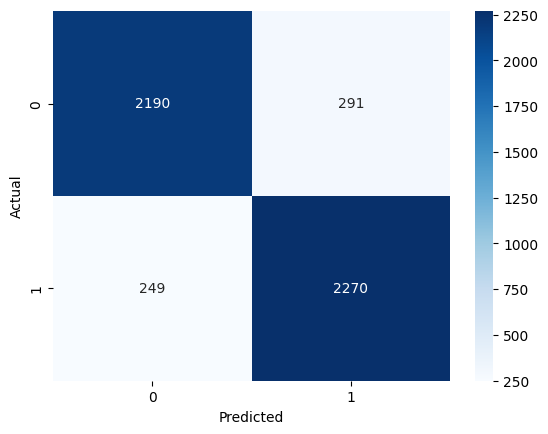

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2481
           1       0.89      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [19]:
import csv

# Detect the delimiter automatically
with open('testData.tsv', 'r') as f:
    dialect = csv.Sniffer().sniff(f.read(1024))
test_data = pd.read_csv('testData.tsv', delimiter=dialect.delimiter)

In [23]:
# Define and load the stopwords
stop_words = set(stopwords.words('english'))

# Load the unlabeled test dataset
test_data = pd.read_csv('testData.tsv', delimiter='\t')

# Data preprocessing for the test data
test_data['review'] = test_data['review'].str.lower()  # Convert text to lowercase
test_data['review'] = test_data['review'].str.replace('[^a-zA-Z]', ' ')  # Remove non-alphabetic characters
test_data['review'] = test_data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Vectorize the test data using the same TF-IDF vectorizer
X_test_unlabeled_tfidf = tfidf_vectorizer.transform(test_data['review'])

# Make predictions on the test data
test_predictions = logistic_classifier.predict(X_test_unlabeled_tfidf)

# Create a DataFrame to store the test predictions
test_results = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predictions})

# Display the test predictions
print(test_results.head())

<ipython-input-23-3d032ead8466>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['review'] = test_data['review'].str.replace('[^a-zA-Z]', ' ')  # Remove non-alphabetic characters


         id  sentiment
0  12311_10          1
1    8348_2          0
2    5828_4          1
3    7186_2          1
4   12128_7          1
